In [1]:
# Importação de pacotes e bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st

In [2]:
# Carregando a base de dados
pokemons = pd.read_csv("Pokemon.csv")
print(f"Base de dados carregada com sucesso. Dimensões {pokemons.shape[0]} linhas e {pokemons.shape[1]} colunas")
print(f"Nome de colunas {pokemons.columns}")

Base de dados carregada com sucesso. Dimensões 800 linhas e 13 colunas
Nome de colunas Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [3]:
# Visualizando o nome e HP do 7 primeiros pókemons
pokemons[['Name','HP']].head(7)

,Name,HP
0,Bulbasaur,45
1,Ivysaur,60
2,Venusaur,80
3,VenusaurMega Venusaur,80
4,Charmander,39
5,Charmeleon,58
6,Charizard,78


In [4]:
soma_hps = sum(pokemons['HP'])
qtde_pokemons = len(pokemons)
print(f"Opção 1 A média de HPs é: {soma_hps/qtde_pokemons}")  # Cálculo manual 
print(f"Opção 2 A média de HPs é: {st.mean(pokemons['HP'])}") # Cálculo automático
print(f"Opção 3 A média de HPs é: {pokemons['HP'].mean()}")   # Cálculo automático, aplicável apenas quando o objeto for um DATAFRAME PANDAS

Opção 1 A média de HPs é: 69.25875
Opção 2 A média de HPs é: 69.25875
Opção 3 A média de HPs é: 69.25875


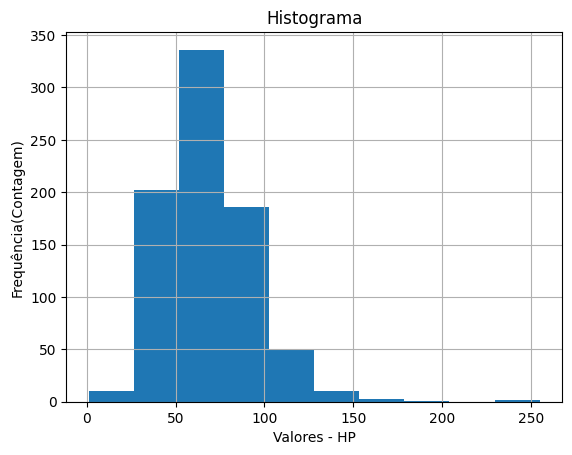

In [5]:
plt.hist(pokemons['HP']) 
plt.xlabel('Valores - HP')
plt.ylabel('Frequência(Contagem)')
plt.title('Histograma')
plt.grid(True)

In [6]:
pokemon1 = pd.DataFrame({'Name': 'Mewthree', 'Type 1': 'Psychic', 'Type 2': '', 'Total': 500000, 'HP': 500000,'Attack' : 0, 'Defense' : 0,
       'Sp. Atk' : 0, 'Sp. Def' : 0, 'Speed' : 0, 'Generation' : 7, 'Legendary': True}, index=[0])
pokemon2 = pd.DataFrame({'Name': 'Mewfour', 'Type 1': 'Psychic', 'Type 2': '', 'Total': 600000, 'HP': 600000,'Attack' : 0, 'Defense' : 0,
       'Sp. Atk' : 0, 'Sp. Def' : 0, 'Speed' : 0, 'Generation' : 7, 'Legendary': True}, index=[0])
pokemon3 = pd.DataFrame({'Name': 'Mewfive', 'Type 1': 'Psychic', 'Type 2': '', 'Total': 850000, 'HP': 800000,'Attack' : 0, 'Defense' : 0,
       'Sp. Atk' : 0, 'Sp. Def' : 0, 'Speed' : 0, 'Generation' : 7, 'Legendary': True}, index=[0])       
pokemons_novo = pd.concat([pokemons, pokemon1])
pokemons_novo = pd.concat([pokemons_novo, pokemon2])
pokemons_novo = pd.concat([pokemons_novo, pokemon3])

In [7]:
print(f"A média de HPs de antes é: {st.mean(pokemons['HP'])}") 
print(f"A média de HPs de agora é: {st.mean(pokemons_novo['HP'])}") 


A média de HPs de antes é: 69.25875
A média de HPs de agora é: 2435.1270236612704


In [8]:
# Considerando os pokemons sem acréscimo dos últimos 3, número 
pokemons_ordenado1_numero_par = pokemons['HP'].sort_values(ascending = True)
pokemons_ordenado1_numero_par = pokemons_ordenado1_numero_par.reset_index()
qtde_pokemons = len(pokemons_ordenado1_numero_par)

elemento_central1 = qtde_pokemons/2
elemento_central2 = qtde_pokemons/2 + 1

media_elementos = (elemento_central1 + elemento_central2)/2
valor = pokemons_ordenado1_numero_par[pokemons_ordenado1_numero_par.index == int(media_elementos)]['HP'].values[0]
valor

65

In [9]:
def calcular_mediana(dataframe,valor_observar):
    # 1 - Ordenando e resetando os índices
    dataframe_ordenado = dataframe[valor_observar].sort_values(ascending = True)
    dataframe_ordenado = dataframe_ordenado.reset_index()
    qtde_elementos = len(dataframe_ordenado)
    # 2 - Cálculo
    if(qtde_elementos % 2 == 0): # ímpar
        elemento_central1 = qtde_elementos/2
        elemento_central2 = qtde_elementos/2 + 1
        media_elementos = (elemento_central1 + elemento_central2)/2
        valor = dataframe_ordenado[dataframe_ordenado.index == int(media_elementos)][valor_observar].values[0]
        return valor
    else: # par
        posicao_mediana = (qtde_elementos+1)/2
        valor = dataframe_ordenado[dataframe_ordenado.index == posicao_mediana][valor_observar].values[0]
        return valor

In [10]:
print(f"Quantidade de pokemons PAR {len(pokemons)} a MEDIANA é {calcular_mediana(pokemons,'HP')}")
print(f"Quantidade de pokemons ÍMPAR {len(pokemons_novo)} a MEDIANA é {calcular_mediana(pokemons_novo,'HP')}")

Quantidade de pokemons PAR 800 a MEDIANA é 65
Quantidade de pokemons ÍMPAR 803 a MEDIANA é 65


In [11]:
# Cálculo automático
# Utilizando o comando abaixo, não precisamos ordenar, visto que é ordenado internamente 
print(f"Quantidade de pokemons PAR {len(pokemons)} a MEDIANA é {st.median(pokemons['HP'])}")
print(f"Quantidade de pokemons ÍMPAR {len(pokemons_novo)} a MEDIANA é {st.median(pokemons_novo['HP'])}")

Quantidade de pokemons PAR 800 a MEDIANA é 65.0
Quantidade de pokemons ÍMPAR 803 a MEDIANA é 65


In [12]:
print(f"POKEMONS sem os 3 SUPERPODEROSOS a MÉDIA é: {st.mean(pokemons['HP'])}")
print(f"POKEMONS sem os 3 SUPERPODEROSOS a MEDIANA é: {st.median(pokemons['HP'])}")

POKEMONS sem os 3 SUPERPODEROSOS a MÉDIA é: 69.25875
POKEMONS sem os 3 SUPERPODEROSOS a MEDIANA é: 65.0


In [33]:
# Cálculo manual
pokemons_ordenado = pd.DataFrame(pokemons['HP'].value_counts().sort_values(ascending= False)) # Somente funciona para dataframes
valor_mais_frequente = max(pokemons_ordenado['count']) # valor mais frequente
# Cálculo automático
print(f"POKEMONS - OPÇÃO 1 A MODA DE HP é: {pokemons_ordenado[pokemons_ordenado['count'] == valor_mais_frequente].index.values[0]}")
print(f"POKEMONS - OPÇÃO 2 A MODA DE HP é: {st.mode(pokemons['HP'])}")

POKEMONS - OPÇÃO 1 A MODA DE HP é: 60
POKEMONS - OPÇÃO 2 A MODA DE HP é: 60


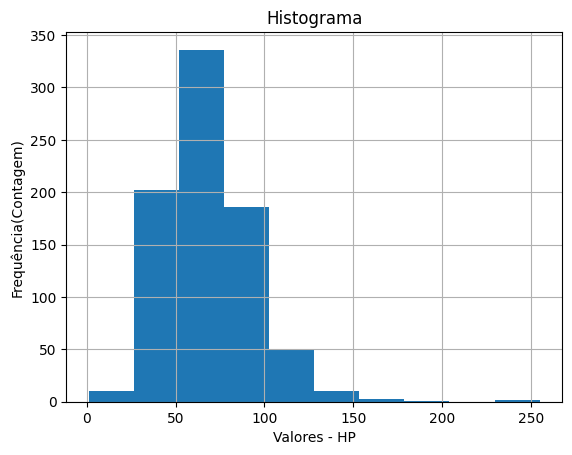

In [35]:
# Confirmando que HP 60 é o valor mais frequente
plt.hist(pokemons['HP']) 
plt.xlabel('Valores - HP')
plt.ylabel('Frequência(Contagem)')
plt.title('Histograma')
plt.grid(True)